<a href="https://colab.research.google.com/github/nserdyukov/AIPD/blob/main/%D0%9B%D0%A012_%D0%A1%D0%B5%D1%80%D0%B4%D1%8E%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 12. Логические методы классификации

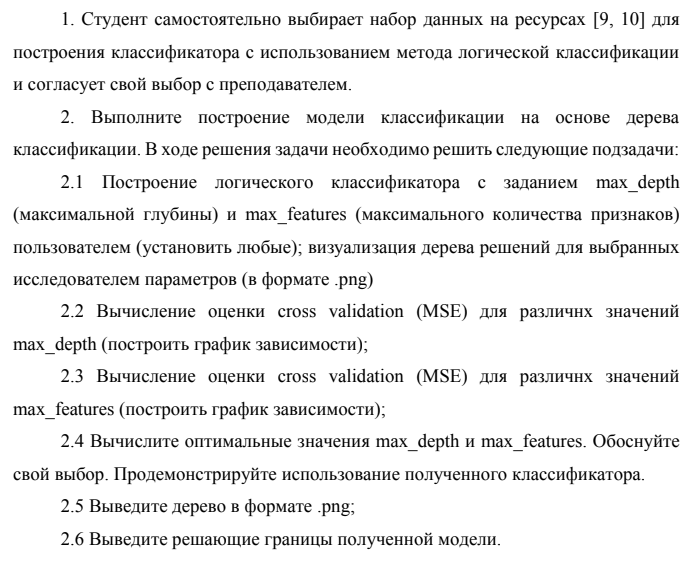

In [ ]:
!wget https://raw.githubusercontent.com/nserdyukov/rice_dataset/refs/heads/main/rice

--2024-12-19 23:54:12--  https://raw.githubusercontent.com/nserdyukov/rice_dataset/refs/heads/main/rice
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22441 (22K) [text/plain]
Saving to: ‘rice’

rice                100%[===================>]  21.92K  --.-KB/s    in 0.001s  

2024-12-19 23:54:12 (21.4 MB/s) - ‘rice’ saved [22441/22441]



In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

data_source = 'rice'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['id','Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation','Class'])

dX = d.iloc[ : , 0:10 ]
dy = d['Class']

print(dX.head())
print(dy.head())

      id   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  10407   4868       145.568204        43.019209      0.955335        4960   
1  10408   6170       164.043222        48.476178      0.955340        6380   
2  10409   6154       164.359482        48.568690      0.955342        6305   
3  10410  10076       164.254703        79.371008      0.875499       10445   
4  10411   6275       166.306520        49.134183      0.955360        6529   

   EquivDiameter    Extent  Perimeter  Roundness  
0      78.728204  0.422790    316.465   0.610814  
1      88.633447  0.491399    354.387   0.617361  
2      88.518451  0.420585    360.455   0.595203  
3     113.265889  0.610667    414.635   0.736489  
4      89.384440  0.617132    370.048   0.575847  
0    1
1    1
2    1
3    0
4    1
Name: Class, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

1.0


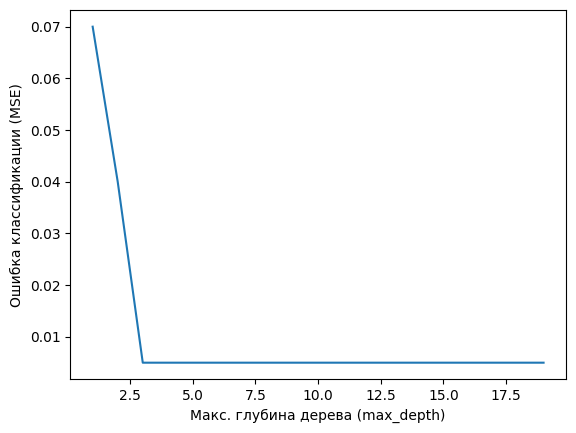

Оптимальные значения max_depth:  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=21,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,10) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

# Генерируем графическое представление лучшего дерева (сохранится в файле)
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=("Gonen","Jasmine"),
                     out_file='iris_tree.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 171 candidates, totalling 1710 fits


Лучшее сочетание параметров:  {'max_depth': 1, 'max_features': 3}
Лучшие баллы cross validation:  1.0


Оптимальное дерево решений


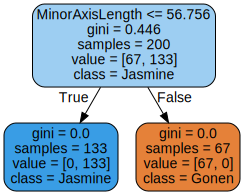

In [ ]:
# На самом деле можно визуализировать в Google Colab следующим бразом
import graphviz
dot_data = tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=("Gonen","Jasmine"),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
print('Оптимальное дерево решений')
graph

In [ ]:
# Поэкспериментируем с визуализацией деревьев...
# max_features = 2, max_depth = 3
dtc = DecisionTreeClassifier(max_depth=1,
                             random_state=21,
                             max_features=2)
# Обучаем
dtc.fit(dX.values, dy)
# Предсказываем
res = dtc.predict([[7834,144.5051815,69.81911157,0.8755365942,8010,99.77908606,0.7779211823,353.898,0.6666629681,2.061524457]])
print(res)

[1]


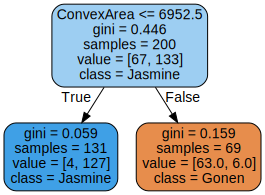

In [ ]:
dot_data = tree.export_graphviz(dtc,
                     feature_names=dX.columns,
                     class_names=("Gonen","Jasmine"),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Построим границы решений для модели

In [ ]:
# Палитры
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cu

In [ ]:

# Настройки для визуализации
plot_markers = ['r*', 'g^']  # Маркеры для классов 0 и 1
answers = dy.unique()  # Классы в целевой переменной
labels = dX.columns.values  # Названия признаков

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16, 16))

# Определяем минимумы и максимумы для сетки
fmin = dX.min().values - 0.5
fmax = dX.max().values + 0.5
plot_step = 0.02

# Обходим все subplot
for i in range(0, 4):
    for j in range(0, 4):

        # Строим решающие границы
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step, dtype=float),
                                 np.arange(fmin[j], fmax[j], plot_step, dtype=float))
            # Обучаем модель на паре признаков
            model = DecisionTreeClassifier(max_depth=2, random_state=21, max_features=3)
            model.fit(dX.iloc[:, [i, j]].values, dy.values)
            # Предсказания для сетки
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            places[i, j].contourf(xx, yy, p, cmap=plt.cm.Pastel2, alpha=0.5)

        # Обход всех классов (Вывод обучающей выборки)
        for id_answer in range(len(answers)):
            # Фильтруем индексы по классу
            idx = dy == answers[id_answer]
            if i == j:
                # Гистограмма на диагонали
                places[i, j].hist(dX.loc[idx, dX.columns[i]],
                                  color=plot_markers[id_answer][0],
                                  histtype='step')
            else:
                # Точки для классов
                places[i, j].plot(dX.loc[idx, dX.columns[i]], dX.loc[idx, dX.columns[j]],
                                  plot_markers[id_answer],
                                  label=f'Class {answers[id_answer]}', markersize=6)

        # Установка подписей осей
        if j == 0:
            places[i, j].set_ylabel(labels[i])

        if i == 3:
            places[i, j].set_xlabel(labels[j])

